In [17]:

# Install necessary packages
!pip install pandas numpy scikit-learn

# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy import stats

# Load dataset
df = pd.read_csv("student_performance_dataset.csv")

# Preview the data
print("Preview of dataset:")
display(df.head())
print("\nShape of dataset:", df.shape)
print("\nColumns in dataset:\n", df.columns.tolist())

# Standardize column names (remove spaces, lowercase, replace special chars)
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_").str.lower()

# Remove student pass/fail or ID column if it exists
cols_to_remove = [col for col in df.columns if "id" in col or "pass_fail" in col]
if cols_to_remove:
    print(f"\nRemoving column(s): {cols_to_remove}")
    df.drop(columns=cols_to_remove, inplace=True)
else:
    print("\nNo student ID or pass/fail column found to remove.")

# Check for missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Fill missing numeric columns with median
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

# Fill missing categorical columns with mode (most common value)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Remove duplicates
initial_shape = df.shape
df = df.drop_duplicates()
print(f"\nRemoved {initial_shape[0] - df.shape[0]} duplicate rows")

# Convert numeric-like columns that are stored as strings
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            continue

# Encode categorical variables using LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Check and remove any columns with all NaN or a single unique value
for col in df.columns:
    if df[col].nunique() <= 1:
        print(f"Dropping constant column: {col}")
        df.drop(columns=[col], inplace=True)

# Check for outliers using z-score and remove them
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]

# Final summary
print("\nCleaned dataset summary:")
print(df.info())
print("\nStatistical summary:")
print(df.describe())
print("\nCleaned dataset shape:", df.shape)

# Save cleaned data
df.to_csv("cleaned_student_performance.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_student_performance.csv'")

Preview of dataset:


,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass



Shape of dataset: (708, 10)

Columns in dataset:
 ['Student_ID', 'Gender', 'Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities', 'Final_Exam_Score', 'Pass_Fail']

Removing column(s): ['student_id', 'pass_fail']

Missing values before cleaning:
gender                        0
study_hours_per_week          0
attendance_rate               0
past_exam_scores              0
parental_education_level      0
internet_access_at_home       0
extracurricular_activities    0
final_exam_score              0
dtype: int64

Removed 208 duplicate rows

Cleaned dataset summary:
<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 707
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      498 non-null    int32  
 1   study_hours_per_week        498 non-null    int64  
 2   attend

### Load dataset

Mean Absolute Error (MAE): 1.71
Mean Squared Error (MSE): 8.07
Root Mean Squared Error:2.84
R² Score: 0.81


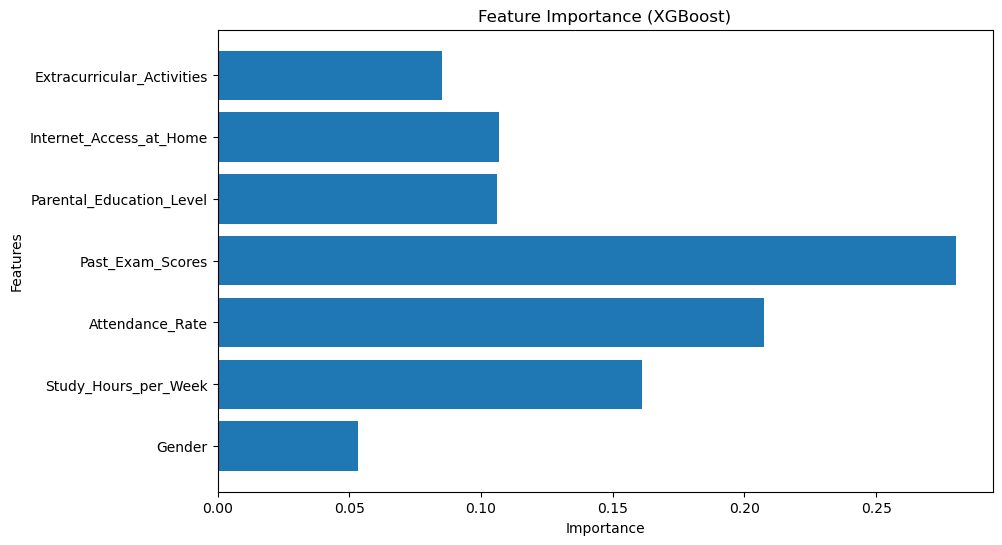

In [18]:
# Install if not yet installed
!pip install xgboost scikit-learn matplotlib pandas

# Import libraries


# Load the dataset
df = pd.read_csv("student_performance_dataset.csv")

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Define features (X) and target (y)
X = df.drop(columns=['Final_Exam_Score', 'Student_ID', 'Pass_Fail'], errors='ignore')
y = df['Final_Exam_Score']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error:{rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(X.columns, model.feature_importances_)
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [19]:
print("Model training features:")
print(list(X.columns))

# Corrected new student DataFrame (matching the model's feature names exactly)
new_student = pd.DataFrame({
    'Gender': [1],
    'Study_Hours_per_Week': [8],
    'Attendance_Rate': [90],
    'Past_Exam_Scores': [75],
    'Parental_Education_Level': [2],
    'Internet_Access_at_Home': [1],
    'Extracurricular_Activities': [0]
})

# Get predicted values for the test set
y_pred = model.predict(X_test)

# Combine into one DataFrame for evaluation
results = pd.DataFrame({
    'Actual_Score': y_test,
    'Predicted_Score': y_pred
})

# Calculate correlation
correlation = results['Actual_Score'].corr(results['Predicted_Score'])
print(f"\n🔹 Correlation between actual and predicted: {correlation:.2f}")


Model training features:
['Gender', 'Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities']

🔹 Correlation between actual and predicted: 0.91


 Correlation between Actual and Predicted: 0.91
 R-squared Value: 0.81


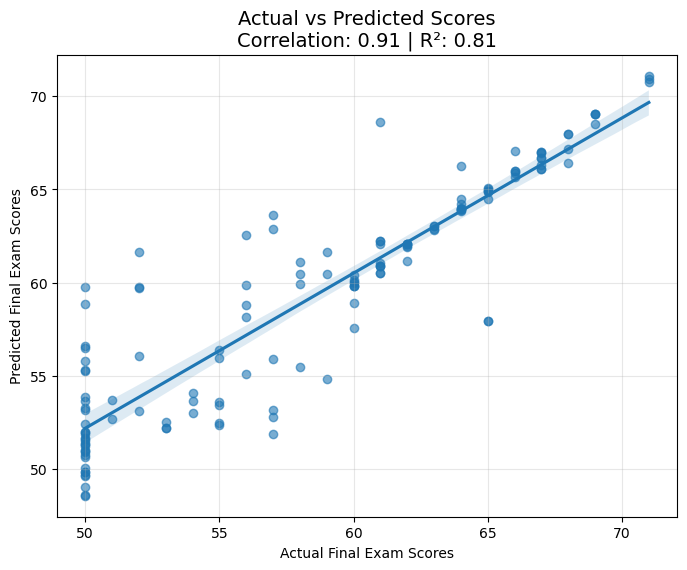

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Get predicted scores on the test set
y_pred = model.predict(X_test)

# Combine into a results DataFrame
results = pd.DataFrame({
    'Actual_Score': y_test,
    'Predicted_Score': y_pred
})

# Calculate correlation
correlation = results['Actual_Score'].corr(results['Predicted_Score'])
r2 = r2_score(results['Actual_Score'], results['Predicted_Score'])

print(f" Correlation between Actual and Predicted: {correlation:.2f}")
print(f" R-squared Value: {r2:.2f}")

#Scatter plot for visualization
plt.figure(figsize=(8, 6))
sns.regplot(x='Actual_Score', y='Predicted_Score', data=results, scatter_kws={'alpha':0.6})
plt.title(f'Actual vs Predicted Scores\nCorrelation: {correlation:.2f} | R²: {r2:.2f}', fontsize=14)
plt.xlabel('Actual Final Exam Scores')
plt.ylabel('Predicted Final Exam Scores')
plt.grid(True, alpha=0.3)
plt.show()


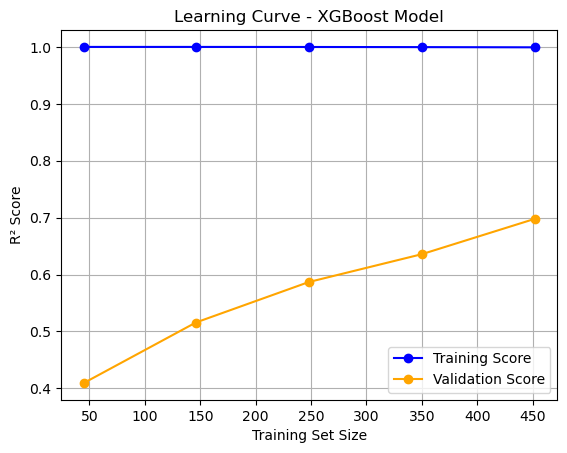

In [21]:
train_sizes, train_scores, test_scores = learning_curve(
    model, 
    X_train, 
    y_train, 
    cv=5, 
    scoring='r2'
)

# Mean scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Validation Score')

plt.title("Learning Curve - XGBoost Model")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.legend(loc='best')
plt.grid(True)
plt.show()
